# Lattice Model

## Read lattice model from IFC file

Here we read the ifc from output file from anaddb, then using this file to generate the lattice model, which has only the harmonic terms.

In [4]:
from ase.io import read
from minimulti.lattice.lattice import Lattice
def read_lattice_model(ifcfile = 'FM_ifc.txt'):
    atoms = read('POSCAR')   # reference atomic structure
    calc = Lattice(ref_atoms=atoms)   # initialize Lattice model
    calc.read_ifc_file(fname=ifcfile) # IFC from ifcfile
    return calc                        

## Phonon calculation from IFC file
 Then we run the lattice model to recalculate the phonon band structure to see if it is the same as the abinit result.

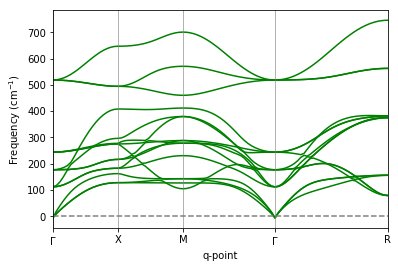

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_phonon(color='green'):
    calc=read_lattice_model(ifcfile = 'FM_ifc.txt')
    ax = calc.plot_phonon_band(color=color, ax=None)
    
    
    plt.show()
plot_phonon()

### Spin-phonon coupling
We can compare the G-AFM phonon and FM phonon.

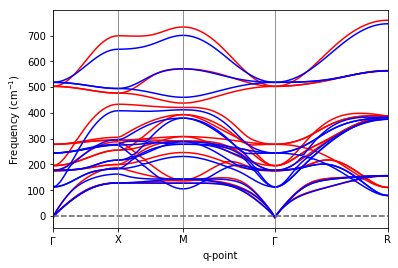

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
def compare_phonon():
    # G-AFM (red)
    calc=read_lattice_model(ifcfile = 'data/G_ifc.txt')
    ax = calc.plot_phonon_band(color='red', ax=None)
    # FM (blue)
    calc=read_lattice_model(ifcfile = 'data/FM_ifc.txt')
    ax = calc.plot_phonon_band(color='blue', ax=ax)
    #sc_calc=calc.make_supercell(np.eye(3)*2)
    #ax = sc_calc.plot_phonon_band(color='green', ax=ax)
    plt.show()
compare_phonon()

## Calculate force and energies
At zero displacement, the forces are almost zero.

In [4]:
import numpy as np
atoms = read('data/POSCAR')
calc=read_lattice_model(ifcfile = 'data/G_ifc.txt')
print("Forces:")
print(calc.get_forces(atoms))
print("ETOT:")
print(calc.get_potential_energy())

Forces:
[[-9.37391165e-09 -9.37391165e-09 -9.37391165e-09]
 [-9.90022926e-09 -9.90022926e-09  2.05189795e-08]
 [ 2.05189795e-08 -9.90022926e-09 -9.90022926e-09]
 [-9.90022926e-09  2.05189795e-08 -9.90022926e-09]
 [ 8.65539064e-09  8.65539064e-09  8.65539064e-09]]
ETOT:
1.7557330599077994e-16


### Supercell and dynamics

In [5]:
import numpy as np
import copy
from ase.md.langevin import Langevin
from ase.units import fs, kB
from ase.io import write

atoms = read('data/POSCAR')
calc=read_lattice_model(ifcfile = 'data/G_ifc.txt')
sc_calc=calc.make_supercell(np.eye(3)*4)
sc_atoms=copy.deepcopy(sc_calc.ref_atoms)
sc_atoms.set_calculator(sc_calc)
#print("Initial disp")
#print(sc_calc.get_dx(sc_atoms))
#sc_calc.get_forces(sc_atoms)
dyn=Langevin(sc_atoms, 0.5*fs, 300*kB, 0.002)
for i in range(1000):
    dyn.run(10)
    write('traj/atom%03d.xyz'%i, sc_atoms)